In [1]:
# Gekko Model construction workflow:
import numpy as np
# 1. import gekko and create model:
from gekko import GEKKO

m = GEKKO()

# 2. define full model dimensionality
ni = 100  # number of rows
nj = 100  # number of columns


xchange = m.Array(m.Var,(ni,nj),value=0.)

# initialise components:
x = m.Array(m.Var,(ni,nj),value=0.)

# init
for i in range(ni):
    for j in range(nj):
        
        x[30,30].value = 2.0
        x[40,40].value = 2.0
        x[50,50].value = 2.0
        x[60,60].value = 2.0
        

#define component_fluxes within grid_cells
for i in range(ni):
    for j in range(nj):
        m.Equation(x[i][j].dt()== xchange[i,j])  # x[i][j]*0.1 +
        
        
#define component_fluxes within grid_cells
#for i in range(ni):
#    for j in range(nj):
        # edges = 
        
        # else = 
for i in [0,ni-1]:
    for j in range(nj-1):
        #print(i,j)
        m.Equation(xchange[i,j].dt() == 0)
        
for j in [ni-1,0]:
    for i in range(nj-1):
        #print(i,j)
        m.Equation(xchange[i,j].dt() == 0)

for i in range(1,ni-1):
    for j in range(1,nj-1):
        #print(i,j)
        m.Equation(xchange[i,j].dt() == 0.1 * ((x[i+1][j] - 2* x[i,j] + x[i-1,j]) + (x[i][j+1] - 2* x[i,j] + x[i,j-1])) )
        
# provide time to model
t = m.Var(0); m.Equation(t.dt()==1)

time = np.arange(0,20)
m.time = time

m.options.imode = 7
m.options.solver = 1
m.options.nodes = 3

m.solve() # disp=False)
print('succesfully solved')

apm 75.80.96.79_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :        20001
   Intermediates:            0
   Connections  :            0
   Equations    :        20001
   Residuals    :        20001
 


ImportError: No solution or server unreachable.
  Show errors with m.solve(disp=True).
  Try local solve with m=GEKKO(remote=False).

In [ ]:
import matplotlib.pyplot as plt
xx = np.array([[x[i][j] for i in range(ni)] for j in range(nj)], dtype='float64')


for i in range(20):
    
    plt.imshow(xx[:,:,i])
    plt.show()

In [15]:
import matplotlib.pyplot as plt
#xx = np.array(x[0], dtype='float64')
x
#plt.plot(xx)
plt.show()

TODOlist, for implementing Gekko/XSIMLAB crossover

# Follow the design of Gekko! create specific xsimlab wrappers

- xs.any_object core keeping track of all necessary params
- 



# I need an xs.any_object core object, that is updated with each component/flux/etc added, that handles gekko "backend" and flexibility, as well as parameters and their assignment.

# Environment stores grid and passes dims to variables

# Fluxes are m.Intermediate
# Fluxes contain necessary parameters
# Fluxes can be flexibly assigned to Components


# Components/SVs store equation/matrix of m.Equations

# Gridfluxes are also computed as intermediates

#


# provide choice for solver, step-wise or gekko


In [13]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model

halfsat = 0.1
N0 = 1.
inflow = 0.1
mortality = 0.1

N = m.SV(1)
P = m.SV(0.1)

# create GEKKO parameter
t = np.linspace(0,50,12001)
m.time = t

nutlim = m.Intermediate(N/(N+halfsat)*P)
inflow = m.Intermediate(N0 * inflow)
mortality = m.Intermediate(P * mortality)

m.Equation(N.dt()==inflow - nutlim)
m.Equation(P.dt()==nutlim - mortality)

m.options.IMODE = 7

m.solve(disp=False)

print('solved')

solved


In [7]:
nutlim

0

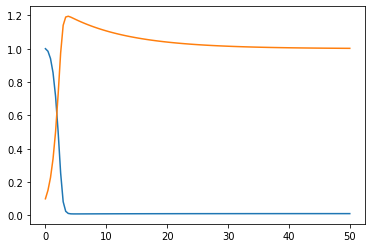

In [10]:
plt.plot(m.time, N)
plt.plot(m.time, P)

apm 75.80.96.79_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           10
   Intermediates:           15
   Connections  :            0
   Equations    :           25
   Residuals    :           10
 
 --- Begin Pre-solve  -----------------------
  Original nvar:         4320
  Original neqn:         4320
  Pre-solve turn off DOF
  Pre-solve Variables:         4320
  Pre-solve Equations:         4320
  --- Solve block size:           72
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.76437E-19  4.79667E-01
    1  2.77970E-21  3.74673E-02
    2  2.80949E-24

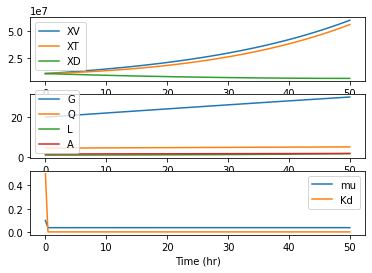

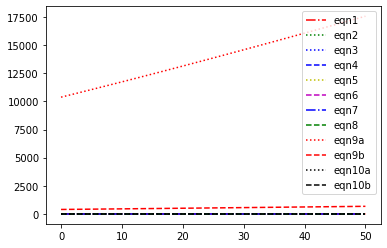

In [2]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model

#constants 3L continuous fed-batch
KdQ = 0.001        #degree of degradation of glutamine (1/h)
mG = 1.1e-10   #glucose maintenance coefficient (mmol/cell/hour)
YAQ = 0.90         #yield of ammonia from glutamine
YLG = 2            #yield of lactate from glucose
YXG = 2.2e8    #yield of cells from glucose (cells/mmol)
YXQ = 1.5e9    #yield of cells from glutamine (cells/mmol)
KL = 150           #lactate saturation constant (mM)
KA = 40            #ammonia saturation constant (mM)
Kdmax = 0.01       #maximum death rate (1/h)
mumax = 0.044      #maximum growth rate (1/h)
KG = 1             #glucose saturation constant (mM)
KQ = 0.22          #glutamine saturation constant (mM)
mQ = 0             #glutamine maintenance coefficient (mmol/cell/hour)
kmu = 0.01         #intrinsic death rate (1/h)
Klysis = 2e-2  #rate of cell lysis (1/h)
Ci_star = 100      #inhibitor saturation concentration (mM)
qi = 2.5e-10   #specific inhibitor production rate (1/h)

#Flow, volume and concentration
Fo = 0.001         #feed-rate (L/h)
Fi = 0.001         #feed-rate (L/h)
V = 3              #volume (L)
SG = 653           #glucose concentration in the feed (mM)
SQ = 58.8          #glutamine concentration in the feed (mM)

# create GEKKO parameter
t = np.linspace(0,50,121)
m.time = t

XTMM = m.Var(value=1,name='XT')            #total cell density (MMcells/L)
XVMM = m.Var(value=1,lb=0, name='XV')      #viable cell density (MMcells/L)
XDMM = m.Var(value=1.0,name='XD')          #dead cell density (MMcells/L)
G = m.Var(value = 20, name='G')            #glucose concentration (mM)
Q = m.Var(value = 4.5, name='Q')           #glutamine concentration (mM)
L = m.Var(value=1,name='L')                #lactate concentration (mM)
A = m.Var(value=1.6,name='A')              #ammonia concentration (mM)
Ci = m.Var(value=0.1,name='Ci')            #inhibitor concentration (mM)
mu = m.Var(value=0.1,name='mu')            #growth rate (1/h)
Kd = m.Var(value=0.5,name='Kd')            #death rate(1/h)

# scale back to cells/L from million cells/L
XT = m.Intermediate(XTMM*1e7)
XV = m.Intermediate(XVMM*1e7)
XD = m.Intermediate(XDMM*1e7)

e1 = m.Intermediate((mu*XV - Klysis*XD - XT*Fo/V)/1e7)
e2 = m.Intermediate(((mu - Kd)*XV - XV*Fo/V)/1e7)
e3 = m.Intermediate((Kd*XV - Klysis*XD - XV*Fo/V)/1e7)
e4 = m.Intermediate((Fi/V)*SG - (Fo/V)*G + (-mu/YXG - mG)*XV)
e5 = m.Intermediate((Fi/V)*SQ - (Fo/V)*Q + (-mu/YXQ - mQ)*XV - KdQ*Q)
e6 = m.Intermediate(-YLG*(-mu/YXG -mG)*XV-(Fo/V)*L)
e7 = m.Intermediate(-YAQ*(-mu/YXQ - mQ)*XV +KdQ*Q-(Fo/V)*A)
e8 = m.Intermediate(qi*XV - (Fo/V)*Ci)
e9a = m.Intermediate((Ci_star*(KG+G)*(KQ+Q)*(L/KL + 1)*(A/KA + 1)))
e9b = m.Intermediate((mumax*G*Q*(Ci_star-Ci)))
e10a = m.Intermediate((mu+kmu))
e10b = m.Intermediate(Kdmax*kmu)

# create GEEKO equations
m.Equation(XTMM.dt() == e1)
m.Equation(XVMM.dt() == e2)
m.Equation(XDMM.dt() == e3)
m.Equation(G.dt() == e4)
m.Equation(Q.dt() == e5)
m.Equation(L.dt() == e6)
m.Equation(A.dt() == e7)
m.Equation(Ci.dt() == e8)
m.Equation(e9a * mu == e9b)
m.Equation(e10a*Kd == e10b)

# solve ODE
m.options.IMODE = 4
m.options.SOLVER = 1
m.options.NODES = 3
m.options.COLDSTART = 2
#m.open_folder()
m.solve(display=False)

plt.figure()
plt.subplot(3,1,1)
plt.plot(m.time, XV.value,label='XV')
plt.plot(m.time, XT.value,label='XT')
plt.plot(m.time, XD.value,label='XD')
plt.legend()
plt.subplot(3,1,2)
plt.plot(m.time, G.value,label='G')
plt.plot(m.time, Q.value,label='Q')
plt.plot(m.time, L.value,label='L')
plt.plot(m.time, A.value,label='A')
plt.legend()
plt.subplot(3,1,3)
plt.plot(m.time, mu.value,label='mu')
plt.plot(m.time, Kd.value,label='Kd')
plt.legend()
plt.xlabel('Time (hr)')

plt.figure()
plt.plot(m.time, e1.value,'r-.',label='eqn1')
plt.plot(m.time, e2.value,'g:',label='eqn2')
plt.plot(m.time, e3.value,'b:',label='eqn3')
plt.plot(m.time, e4.value,'b--',label='eqn4')
plt.plot(m.time, e5.value,'y:',label='eqn5')
plt.plot(m.time, e6.value,'m--',label='eqn6')
plt.plot(m.time, e7.value,'b-.',label='eqn7')
plt.plot(m.time, e8.value,'g--',label='eqn8')
plt.plot(m.time, e9a.value,'r:',label='eqn9a')
plt.plot(m.time, e9b.value,'r--',label='eqn9b')
plt.plot(m.time, e10a.value,'k:',label='eqn10a')
plt.plot(m.time, e10b.value,'k--',label='eqn10b')
plt.legend()

plt.show()